# Introduction to Utulity Matrix

There are two main entities in Recommendation Systems: users and items. Each user will have a different degree of preference for each item. This level of interest, if known in advance, is assigned a value for each user-item pair. Assuming that the level of interest is measured by the user rate value for the item, we temporarily call this value the rating. The collection of all ratings, including the unknown values ​​that need to be predicted, forms a matrix called the utility matrix.

## Example of a utility matrix

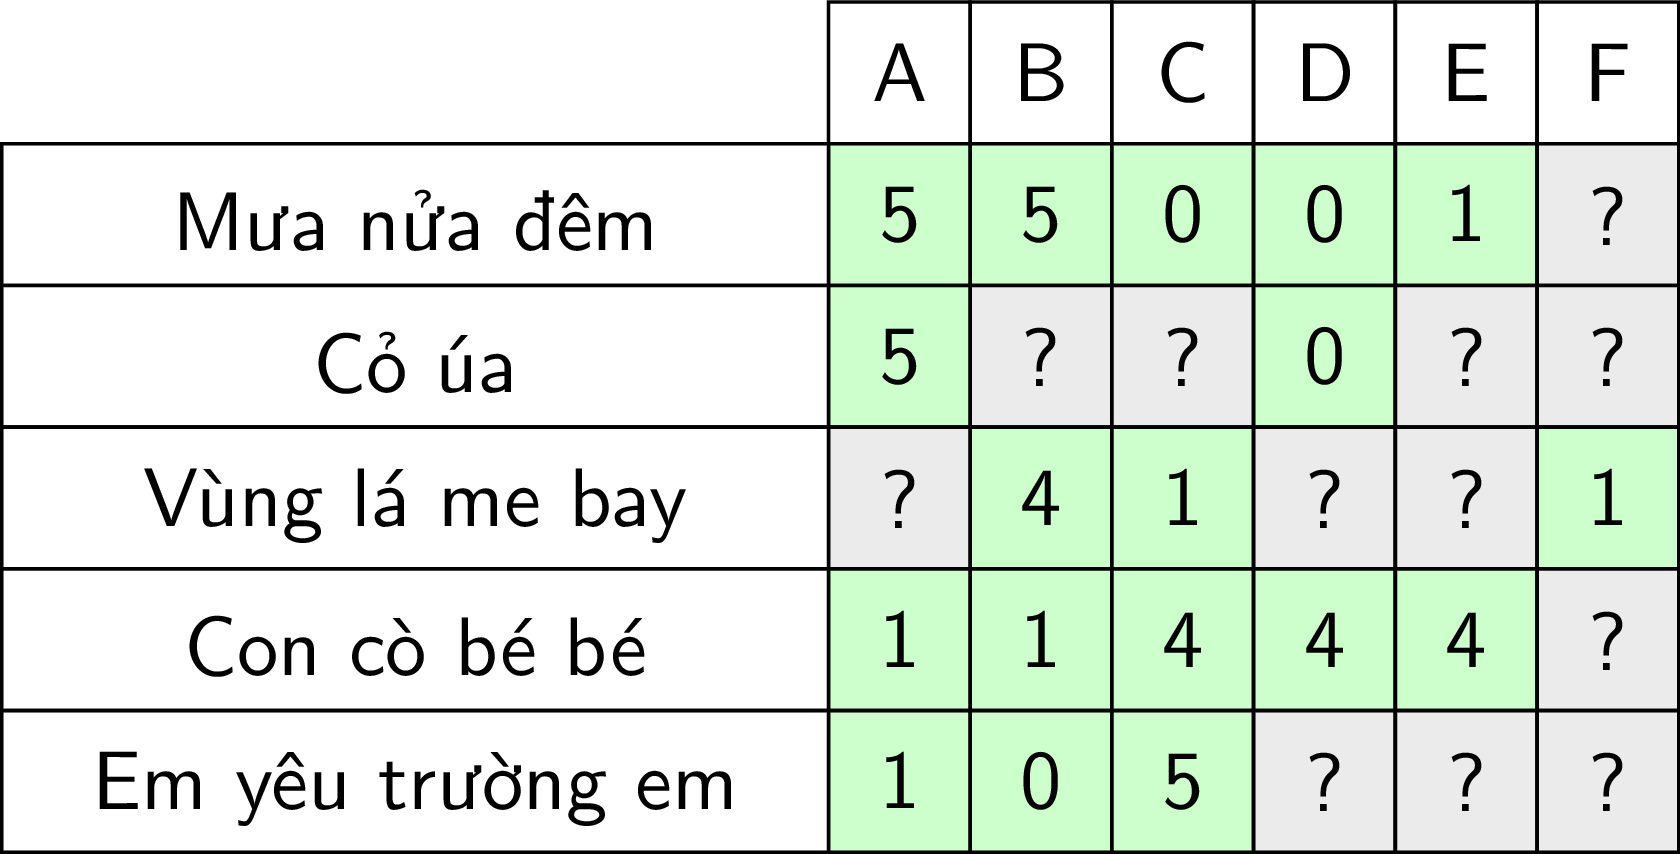

_Figure 1: Example of utility matrix with Song Suggestion system. Songs are rated by users on a scale from 0 to 5 stars. The '?' The gray background indicates that the data does not exist in the database. Recommendation Systems need to populate these values ​​themselves_

In this example, there are 6 users A, B, C, D, E, F and 5 songs. The blue boxes represent whether a user has rated a song with ratings from 0 (disliked) to 5 (liked very much). Cells with a gray '?' mark correspond to cells without data. The job of a Recommendation System is to predict the values ​​in these gray cells, thereby providing suggestions to the user. Recommendation Systems, therefore, are sometimes also considered Matrix Completion problems.

In this simple example, it is easy to see that there are 2 different music genres: the first 3 songs are Bolero music and the last 2 songs are Children's music. From this data, we can also guess that A and B like the Bolero genre; C, D, E, F like the Children's genre. From there, a good system should suggest _Cỏ úa_ to B; _Vùng lá me bay_ for A; _Em yêu trường em_ for D, E, F. Assuming there are only these two music genres, when there is a new song, we just need to classify it into which genre, thereby giving suggestions to each user.

Normally, there are many users and items in the system, and each user usually only rates a very small number of items, and there are even users who do not rate any items (for these users, the best way is to suggest items most popular). Therefore, the number of gray cells of the utility matrix in those problems is often very large, and the number of filled cells is a very small number.

It is clear that the more cells are filled in, the more the system's accuracy will improve. Therefore, systems always ask users about their interest in products, and want users to rate as many products as possible. Evaluating products, therefore, not only helps other users know the quality of the product but also helps the system know the user's preferences, thereby having a reasonable advertising policy.

## Constructing a utility matrix

Without a Utility matrix, it is almost impossible to suggest products to users, other than always suggesting the most popular products. Therefore, in Recommender Systems, building a Utility Matrix is ​​paramount. However, building this matrix often faces many difficulties. There are two common approaches to determining the rating value for each user-item pair in the Utility Matrix:

1. Ask users to rate products: Amazon always asks users to rate their products by sending reminder emails multiple times. Many other systems work similarly. However, this approach has a few limitations, because users usually rarely rate products. And if there are, they may be biased reviews by those willing to rate.
2. The second approach is based on user behavior. Obviously, if a user buys a product on Amazon, watches a clip on YouTube (possibly multiple times), or reads an article, it can be confirmed that the user likes that product. Facebook also relies on what content you like to display related content in your newsfeed. The more passionate you are about Facebook, the more Facebook benefits, so it always brings you information that you are likely to want to read (don't judge society through Facebook). Usually, with this method, we can only build a matrix with components of `1` and `0`, with `1` representing the user likes the product, `0` representing no information. In this case, `0` does not mean lower than `1`, it just means that the user has not provided information. We can also build a matrix with values ​​higher than `1` through the time or number of times a user views a certain product. Sometimes, the dislike button also brings certain benefits to the system, at this time the corresponding value can be assigned to `-1`, for example.

# Content-Based Recommendations

## Item profiles

In content-based systems, that is, based on the content of each item, we need to build a profile for each item. This profile is represented mathematically as a feature vector. In simple cases, the feature vector is directly extracted from the item. There are many other elements of a song that can be used. Except for the difficult-to-define Genre, the other factors are clearly defined. In the example in _Figure 1_ above, we simplify the problem by building a two-dimensional feature vector for each song: the first dimension is the Bolero level, the second dimension is the Children's level of that song. Let the feature vectors for each song be $\mathbf{x}_1, \mathbf{x}_2, \mathbf{x}_3, \mathbf{x}_4, \mathbf{x}_5$. Let's say the feature vectors (in row form) for each song are given in _Figure 2_ below (here, we'll assume these vectors have been determined somehow):

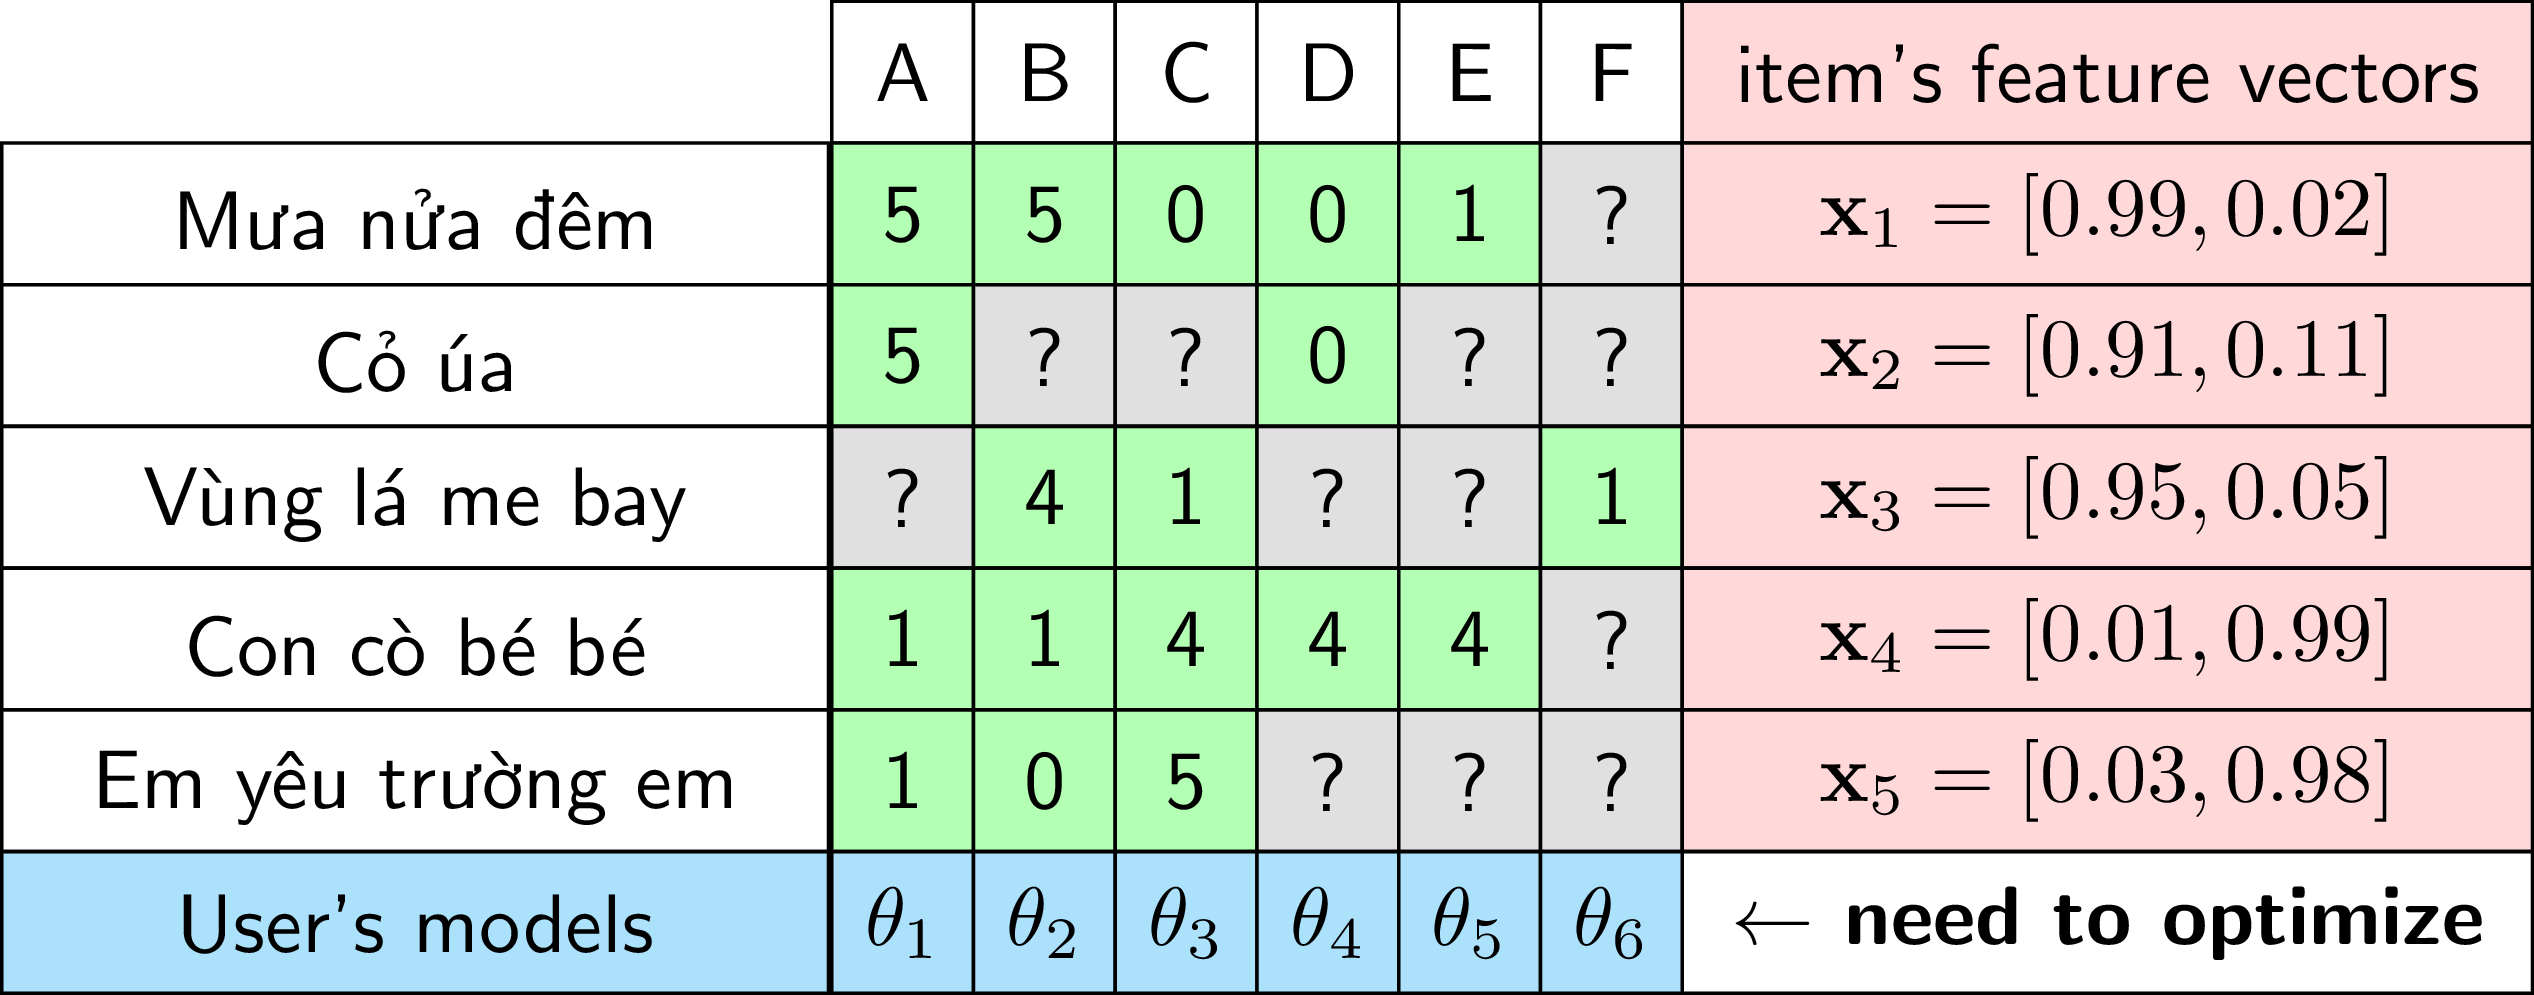

_Figure 2: Suppose the feature vector for each product is given in the last column. For each user, we need to find a corresponding $\theta_i$ model so that the resulting model is the best_

The problem of finding the $\theta_i$ model for each user can be considered a Regression problem in case ratings are a range of values, or a Classification problem in case ratings are some specific cases, such as like/dislike, for example. The training data to build each model $\theta_i$ are pairs (item profile, rating) corresponding to the items that that user rated. Filling in missing values ​​in the Utility matrix is ​​predicting the output for unrated items when applying the $\theta_i$ model on them. This output can be written as a function $f(\theta_i, \mathbf{x}_i$). The choice of the form of $f(\theta_i, \mathbf{x}_i$) depends on the problem. In this chapter we will be concerned with the simplest form - the linear form.

## Constructing the loss function

Suppose that the number of users is $N$, the number of items is $M$. Profile matrix $\mathbf{X} = [\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_M]\in\mathbb{R}^{d\times M}$, and utility matrix $\mathbf{Y}\in\mathbb{R}^{M\times N}$.

The component in the $m^{th}$ row and $n^{th}$ column of $\mathbf{Y}$ is the level of interest (here is the number of rated stars) of the nth user on the mth item that the system has collected. The $\mathbf{Y}$ matrix is ​​missing many components corresponding to the values ​​that the system needs to predict. In addition, let $\mathbf{R}$ be the rated or not matrix that represents whether a user has rated an item or not. Specifically, $r_{ij}$ is equal to 1 if the $i^{th}$ item has been rated by the $n^{th}$ user, equal to $0$ otherwise.

### Linear model

Suppose that we can find a model for each user, illustrated by a column vector of coefficients $\mathbf{w}_n \in \mathbb{R}^d$ and bias $b_n$ such that a user's interest in an item can be calculated by a linear function:

$$y_{mn} = \mathbf{w}_n^T\mathbf{x}_m + b_n$$

Considering any $n^{th}$ user, if we consider the training set as the set of filled elements of $\mathbf{y}_n$ ($n^{th}$ column of matrix $\mathbf{Y}$), we can build a loss function similar to [Ridge Regression](https://github.com/letruongzzio/Machine-Learning/blob/main/2%20-%20Linear%20Regression%20and%20Overfitting/Linear%20Regression.ipynb) as follows:

$$\mathcal{L}_n(\mathbf{w}_n, b_n) = \frac{1}{2s_n} \sum_{m~:~ r_{mn} = 1}(\mathbf{w}_n^T\mathbf{x}_m + b_n - y_{mn})^2 + \frac{\lambda}{2s_n} ||\mathbf{w}_n||_2^2$$

where, the second component is regularization and $\lambda$ is a positive parameter; $s_n$ is the number of items that the $n^{th}$ user has rated, is the sum of the elements on the $n^{th}$ column of the matrix $\mathbf{R}$, i.e. $s_n = \sum_{m=1}^M r_{mn}$. Note that regularization is usually not applied to bias $b_n$.

Since the loss function expression depends only on the items that have been evaluated, we can simplify it by letting $\hat{\mathbf{y}}_n\in\mathbb{R}^{s_n}$ be a subvector of $\mathbf{y}_n$, constructed by extracting the components other than the `?` in $n^{th}$ column of $\mathbf{Y}$. At the same time, let $\hat{\mathbf{X}}_n\in\mathbb{R}^{d\times s_n}$ be the submatrix of the feature matrix $\mathbf{X}$, created by extracting the columns corresponding to the items rated by the $n^{th}$ user. (See example below for better understanding). Then, the model's loss function expression for the nth user is shortened to:

$$\mathcal{L}_n = \frac{1}{2s_n} ||\hat{\mathbf{X}}_n^T\mathbf{w}_n + b_n \mathbf{e}_n- \hat{\mathbf{y}}_n||_2^2 + \frac{\lambda}{2s_n} ||\mathbf{w}_n||_2^2$$

where, $\mathbf{e}_n$ is the column vector with all components being $1$. This is exactly the loss function of ridge regression. The pair of solutions $\mathbf{w}_n, b_n$ can be found through gradient descent algorithms. In this notebook, we will directly use the `Ridge` class in `sklearn.linear_model`. There is a notable point here that $\mathbf{w}_n$ is only determined if the nth user has rated at least one product.

### Example of the loss function for user E

Going back to the example in Figure 2, the feature matrix for items (each row corresponds to an item) is:

$$
\mathbf{X} = 
    \left[
        \begin{matrix}
            0.99 & 0.91 & 0.95 & 0.01 & 0.03 \newline
            0.02 & 0.11 & 0.05 & 0.99 & 0.98
        \end{matrix}
    \right]
$$

Consider the case of user E with $n = 5, y_5 = [1, ?, ?, 4, ?]^T \Rightarrow r_5 = [1, 0, 0, 1, 0]^T$. Because E has only evaluated the first and fourth items, $s_5 = 2$. Furthermore:

$$
\hat{\mathbf{X}}_5 = 
    \left[
        \begin{matrix}
            0.99 & 0.01 \newline
            0.02 & 0.99
        \end{matrix}
    \right], \
\hat{\mathbf{y}}_5 = 
    \left[
        \begin{matrix}
            1 \newline
            4 
        \end{matrix}
    \right], ~
\mathbf{e}_5 = 
    \left[
        \begin{matrix}
            1 \newline
            1 
        \end{matrix}
    \right]
$$

Then, the loss function for the coefficient corresponding to user E is:

$$
\mathcal{L}_5 = \frac{1}{4} \left|\left|\left[
\begin{matrix}
    0.99 & 0.02 \newline
    0.01 & 0.99
\end{matrix}
\right]\mathbf{w}_5  + b_5\left[
\begin{matrix}
    1 \newline
    1
\end{matrix}
\right] -
\left[
\begin{matrix}
    1 \newline
    4
\end{matrix}
\right]\right|\right|_2^2 + \frac{\lambda}{4} ||\mathbf{w}_5||_2^2
$$

## Problem with MovieLens 100k database

The [MovieLens 100k database](https://grouplens.org/datasets/movielens/100k/) was published in 1998 by [GroupLens](https://grouplens.org/). This database includes 100,000 ratings from 943 users for 1682 movies. In the notebook, I use this smallest database for illustration purposes.

After downloading and decompressing, we will obtain many small files. We only need to pay attention to the following files:

+ `u.data`: Contains all ratings of 943 users for 1682 movies. Each user rates at least 20 movies. Time rate information is also given but we do not use it in this notebook.

+ `ua.base, ua.test, ub.base, ub.test`: are two ways to divide the entire data into two subsets, one for training, one for testing. We will practice on `ua.base` and `ua.test`.

+ `u.user`: Contains information about users, including: id, age, gender, occupation, zipcode (region), because this information can also affect the interests of users. However, in this notebook, we will not use this information, except for id information to identify different users.

+ `u.genre`: Contains the names of 19 movie genres. Genres include: `unknown, Action, Adventure, Animation, Children's, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western,...`

+ `u.item`: information about each movie. The first few lines of the file:
```markdown
1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0
2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
3|Four Rooms (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
4|Get Shorty (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)|0|1|0|0|0|1|0|0|1|0|0|0|0|0|0|0|0|0|0
```

In each line we will see the movie id, movie name, release date, imdb link and binary numbers `0, 1` at the end to indicate which of the 19 genres the movie belongs to in the `u.genre`. A movie can belong to many different genres. Information about this category will be used to build the item profile.

In [1]:
import numpy as np
import pandas as pd 

# Reading user file:
u_cols =  ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('Datasets/ml-100k/u.user', sep='|', names=u_cols, encoding='latin-1') # the encoding is necessary to avoid an error
n_users = users.shape[0]
print('Number of users:', n_users)
users.head()

Number of users: 943


,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [2]:
# Reading ratings file:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

ratings_base = pd.read_csv('Datasets/ml-100k/ua.base', sep='\t', names=r_cols, encoding='latin-1')
ratings_test = pd.read_csv('Datasets/ml-100k/ua.test', sep='\t', names=r_cols, encoding='latin-1')

print('Rating base:\n', ratings_base)
print('Rating test:\n', ratings_test)

rate_train = ratings_base.values # convert to numpy array
rate_test = ratings_test.values

print('Rating train:\n', rate_train)
print('Rating test:\n', rate_test)

print('Number of users:', n_users)
print('Number of traing rates:', rate_train.shape[0])
print('Number of test rates:', rate_test.shape[0])

Rating base:
        user_id  movie_id  rating  unix_timestamp
0            1         1       5       874965758
1            1         2       3       876893171
2            1         3       4       878542960
3            1         4       3       876893119
4            1         5       3       889751712
...        ...       ...     ...             ...
90565      943      1047       2       875502146
90566      943      1074       4       888640250
90567      943      1188       3       888640250
90568      943      1228       3       888640275
90569      943      1330       3       888692465

[90570 rows x 4 columns]
Rating test:
       user_id  movie_id  rating  unix_timestamp
0           1        20       4       887431883
1           1        33       4       878542699
2           1        61       4       878542420
3           1       117       3       874965739
4           1       155       2       878542201
...       ...       ...     ...             ...
9425      943       23

In [3]:
rate_train[:4, :]

array([[        1,         1,         5, 874965758],
       [        1,         2,         3, 876893171],
       [        1,         3,         4, 878542960],
       [        1,         4,         3, 876893119]])

The first row is understood as the first user rating the first movie 5 stars. The last column is a number indicating the evaluation time, we will ignore this parameter.

### Constructing item profiles

The important job in a content-based recommendation system is to build a profile for each item, that is, a feature vector for each item. First of all, we need to load all 
information about the items into the `items` variable:

In [4]:
#Reading items file:
i_cols = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

items = pd.read_csv('Datasets/ml-100k/u.item', sep='|', names=i_cols, encoding='latin-1') 

n_items = items.shape[0]
print('Number of items:', n_items)
print('Items:\n', items.head())

Number of items: 1682
Items:
    movie id        movie title release date  video release date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            IMDb URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   Adventure  Animation  Children's  ...  Fantasy  Film-Noir  Horror  Musical  \
0          0          1           1  ...       

Since we are building a profile based on the genre of the movie, we will only care about the 19 binary values ​​at the end of each row:

In [17]:
X0 = items.values
X_train_counts = X0[:, -19:]
print('X_train_counts shape:', X_train_counts.shape)
print('X_train_counts:\n', X_train_counts)

X_train_counts shape: (1682, 19)
X_train_counts:
 [[0 0 0 ... 0 0 0]
 [0 1 1 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Next, we will build a feature vector for each item based on the movie genre matrix and the [TF-IDF]((https://en.wikipedia.org/wiki/Tf%E2%80%93idf)) feature in `sklearn` library:

In [6]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=True, norm ='l2') 
# `smooth_idf=False` will make the idf more like "standard", not giving too much weight to low document frequencies.
# `smooth_idf=True` (the default) will give more weight to low document frequencies.
# `norm='l2'` will ensure all our feature vectors have a Eucledian norm of 2.
X = transformer.fit_transform(X_train_counts).toarray()

In TF-IDF, the term frequency (TF) is the number of times a term appears in a document, divided by the total number of terms in the document. The inverse document frequency (IDF) is the logarithm of the number of documents divided by the number of documents that contain the term. The TF-IDF value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general:

$$\text{TF}(t, d) = \frac{f_{t, d}}{\sum_{t'\in d} f_{t', d}}\in [0, 1]$$

where, $f_{t, d}$ is number of times term $t$ appears in document $d$, $\sum_{t'\in d} f_{t', d}$ is total number of terms in document $d$.

$$\text{IDF}(t, D) = \log\left(\frac{|D|}{|\{d\in D: t\in d\}|}\right)\in [0, \infty]$$

where, $|D|$ is total number of documents in the corpus $D$, $|\{d\in D: t\in d\}|$ is number of documents in the corpus $D$ that contain term $t$.

$$\text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D)\in [0, \infty]$$

We have the following observations:

+ If the term frequency is high, the term is important to the document.
+ If the inverse document frequency is high, the term is not common in the corpus.
+ If the TF-IDF value is high, the term is important to the document but not common in the corpus and vice versa.

In [16]:
X[:5, :]

array([[0.  , 0.  , 0.  , 0.74, 0.57, 0.35, 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.54, 0.65, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.54, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.71, 0.  , 0.  , 0.  , 0.54, 0.  , 0.  , 0.45, 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.74, 0.  , 0.36, 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.57, 0.  , 0.  ]])

In [8]:
X.shape

(1682, 19)

After this step, each row of `X` corresponds to the feature vector of a movie.

### Finding the model for each user

For each user, we need to find the movies rated by the user and the value of the ratings:

In [9]:
def get_items_rated_by_user(rate_matrix, user_id):
    y = rate_matrix[:, 0] # all users
    # item indices rated by user_id
    # we need to +1 to user_id since in the rate_matrix, id starts from 1 
    # but id in python starts from 0
    ids = np.where(y == user_id + 1)[0] 
    item_ids = rate_matrix[ids, 1] - 1 # index starts from 0
    scores = rate_matrix[ids, 2] 
    return (item_ids, scores)

Now, we can find the coefficient of Ridge Regression for each user:

In [10]:
from sklearn.linear_model import Ridge
from sklearn import linear_model

d = X.shape[1] # data dimension
W = np.zeros((d, n_users))
b = np.zeros(n_users)

for n in range(n_users):    
    ids, scores = get_items_rated_by_user(rate_train, n)
    model = Ridge(alpha=0.01, fit_intercept=True)
    Xhat = X[ids, :]
    model.fit(Xhat, scores) 
    W[:, n] = model.coef_
    b[n] = model.intercept_

In [11]:
# predicted scores
Yhat = X.dot(W) + b

In [12]:
Yhat[0:5, 0:5] # the rows are item, columns are users

array([[2.91838332, 3.99617751, 1.90305533, 5.65815133, 3.47767686],
       [2.80263057, 3.43501556, 3.29904303, 2.88013131, 2.85140383],
       [3.4830386 , 1.56190995, 1.26948894, 4.94572417, 2.14642533],
       [3.58198466, 6.094671  , 3.65098564, 6.17444674, 3.06945321],
       [3.80713061, 3.70664738, 3.40554116, 5.02082824, 3.48398483]])

In [13]:
Yhat.shape

(1682, 943)

The example below is for a user whose `id` is 100:

In [14]:
n = 100
np.set_printoptions(precision=2) # 2 digits after 
ids, scores = get_items_rated_by_user(rate_test, n)

print('Rated movies ids :', ids)
print('True ratings     :', scores)
print('Predicted ratings:', Yhat[ids, n])

Rated movies ids : [221 251 280 281 303 368 404 470 595 828]
True ratings     : [3 3 2 3 3 2 4 3 3 3]
Predicted ratings: [3.28 3.5  3.07 2.28 3.23 2.11 2.83 3.29 2.69 3.28]


To evaluate the found model, we will use Root Mean Squared Error (RMSE). The error is calculated as the difference between _true rating_ and _predicted rating_:

In [15]:
def evaluate(Yhat, rates, W, b):
    se = 0
    cnt = 0
    for n in range(n_users):
        ids, scores_truth = get_items_rated_by_user(rates, n)
        scores_pred = Yhat[ids, n]
        e = scores_truth - scores_pred 
        se += (e**2).sum(axis = 0)
        cnt += e.size 
    return np.sqrt(se / cnt)

print('RMSE for training: ', evaluate(Yhat, rate_train, W, b))
print('RMSE for test    : ', evaluate(Yhat, rate_test, W, b))

RMSE for training:  0.908980456282672
RMSE for test    :  1.2703282700393035


Thus, with the training set, the error is about `0,91` (star); with the test set, the error is a bit larger, about `1,27`. These results are not really good because the model has been simplified too much. Better results can be seen in the next chapters on Collaborative filtering.

### Some drawbacks of Content-based recommendations

The characteristic of content-based recommendation system is that the model construction for each user does not depend on other users but depends on the profile of the items. This has the advantage of saving memory and computing time. This approach has two basic disadvantages: 

1. When building a model for a single user, content-based systems do not take advantage of information from other users. This information is often useful because the purchasing behavior of users is often grouped into a few simple groups. If the purchasing behavior of a few users in a group is known, the system will be able to infer the behavior of the remaining users.
2. We can't always build a profile for each item.